<a href="https://colab.research.google.com/github/earroyoh/Kaggle/blob/master/Google-Landmark-Recognition-Challenge-2019/google-landmark-v2-simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from shutil import copyfile,rmtree

os.mkdir('/tmp/google-landmark')
os.mkdir('/tmp/google-landmark/train')

#rmtree('/tmp/google-landmark/test')
os.mkdir('/tmp/google-landmark/test')

FileExistsError: [Errno 17] File exists: '/tmp/google-landmark'

In [2]:
# Download training images
# I just download a few ones to create the model and not oversize colab environment
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_000.tar \
    -O /tmp/google-landmark/train/images_000.tar
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_050.tar \
    -O /tmp/google-landmark/train/images_050.tar
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_100.tar \
    -O /tmp/google-landmark/train/images_100.tar
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_150.tar \
    -O /tmp/google-landmark/train/images_150.tar
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_200.tar \
    -O /tmp/google-landmark/train/images_200.tar
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_250.tar \
    -O /tmp/google-landmark/train/images_250.tar
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_300.tar \
    -O /tmp/google-landmark/train/images_300.tar
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_350.tar \
    -O /tmp/google-landmark/train/images_350.tar

--2019-05-21 15:56:47--  https://s3.amazonaws.com/google-landmark/train/images_000.tar
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.186.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.186.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1067018752 (1018M) [application/x-tar]
Saving to: ‘/tmp/google-landmark/train/images_000.tar’

/tmp/google-landmar 100%[===================>]   1018M  39.3MB/s    in 28s     

2019-05-21 15:57:15 (37.0 MB/s) - ‘/tmp/google-landmark/train/images_000.tar’ saved [1067018752/1067018752]

--2019-05-21 15:57:15--  https://s3.amazonaws.com/google-landmark/train/images_050.tar
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.135.29
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.135.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1066296320 (1017M) [application/x-tar]
Saving to: ‘/tmp/google-landmark/train/images_050.tar’

/tmp/google-landmar 100%[=================

In [2]:
# Download a training file as validation file
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_000.tar \
    -O /tmp/google-landmark/train/images_000.tar
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_400.tar \
    -O /tmp/google-landmark/test/images_400.tar 

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/enri/.wget-hsts'. HSTS will be disabled.
--2019-05-22 09:16:31--  https://s3.amazonaws.com/google-landmark/train/images_000.tar
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.162.205
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.162.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1067018752 (1018M) [application/x-tar]
Saving to: ‘/tmp/google-landmark/train/images_000.tar’

/tmp/google-landmar 100%[===================>]   1018M  4.13MB/s    in 4m 3s   

2019-05-22 09:20:35 (4.19 MB/s) - ‘/tmp/google-landmark/train/images_000.tar’ saved [1067018752/1067018752]

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/enri/.wget-hsts'. HSTS will be disabled.
--2019-05-22 09:20:35--  https://s3.amazonaws.com/google-landmark/train/images_400.ta

The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [4]:
# Download CSV datasets with images id's and landmarks id's
#!wget --no-check-certificate \
#     https://www.kaggle.com/google/google-landmarks-dataset/downloads/google-landmarks-dataset.zip \
#    -O /tmp/google-landmark/google-landmarks-dataset.zip

!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/metadata/train.csv \
    -O /tmp/google-landmark/train.csv
#!wget --no-check-certificate \
#     https://s3.amazonaws.com/google-landmark/metadata/test.csv \
#    -O /tmp/google-landmark/test.csv

  
# Extract files
#import zipfile

#local_zip = '/tmp/google-landmark/google-landmarks-dataset.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp/google-landmark')
#zip_ref.close()

--2019-05-21 16:00:09--  https://s3.amazonaws.com/google-landmark/metadata/train.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.170.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.170.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525832518 (501M) [text/csv]
Saving to: ‘/tmp/google-landmark/train.csv’

/tmp/google-landmar 100%[===================>] 501.47M  48.4MB/s    in 13s     

2019-05-21 16:00:22 (39.4 MB/s) - ‘/tmp/google-landmark/train.csv’ saved [525832518/525832518]



In [6]:
import tarfile

tar = tarfile.open("/tmp/google-landmark/train/images_000.tar")
tar.extractall('/tmp/google-landmark/train')
tar.close()
tar = tarfile.open("/tmp/google-landmark/test/images_400.tar")
tar.extractall('/tmp/google-landmark/test')
tar.close()

In [0]:
# Extract images tar files

# OS system calls
#c
#!tar -tvf '/tmp/google-landmark/train/images_50.tar' -C '/tmp/google-landmark/train'
#!tar -tvf '/tmp/google-landmark/train/images_100.tar' -C '/tmp/google-landmark/train'
#!tar -tvf '/tmp/google-landmark/train/images_150.tar' -C '/tmp/google-landmark/train'
#!tar -tvf '/tmp/google-landmark/train/images_200.tar' -C '/tmp/google-landmark/train'
#!tar -tvf '/tmp/google-landmark/train/images_250.tar' -C '/tmp/google-landmark/train'
#!tar -tvf '/tmp/google-landmark/train/images_300.tar' -C '/tmp/google-landmark/train'
#!tar -tvf '/tmp/google-landmark/train/images_350.tar' -C '/tmp/google-landmark/train'
#!tar -xvf '/tmp/google-landmark/test/images_400.tar' -C '/tmp/google-landmark/test'


import tarfile

tar = tarfile.open("/tmp/google-landmark/test/images_000.tar")
tar.extractall('/tmp/google-landmark/train')
tar.close()
tar = tarfile.open("/tmp/google-landmark/train/images_050.tar")
tar.extractall('/tmp/google-landmark/train')
tar.close()
tar = tarfile.open("/tmp/google-landmark/train/images_100.tar")
tar.extractall('/tmp/google-landmark/train')
tar.close()
tar = tarfile.open("/tmp/google-landmark/train/images_150.tar")
tar.extractall('/tmp/google-landmark/train')
tar.close()
tar = tarfile.open("/tmp/google-landmark/train/images_200.tar")
tar.extractall('/tmp/google-landmark/train')
tar.close()
tar = tarfile.open("/tmp/google-landmark/train/images_250.tar")
tar.extractall('/tmp/google-landmark/train')
tar.close()
tar = tarfile.open("/tmp/google-landmark/train/images_300.tar")
tar.extractall('/tmp/google-landmark/train')
tar.close()
tar = tarfile.open("/tmp/google-landmark/train/images_350.tar")
tar.extractall('/tmp/google-landmark/train')
tar.close()

tar = tarfile.open("/tmp/google-landmark/test/images_400.tar")
tar.extractall('/tmp/google-landmark/test')
tar.close()

The contents of the .zip are extracted to the base directory `/tmp/google-landmark`, which in turn each contain `train` and `test` subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc. 

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. If you remember with the handwriting example earlier, we had labelled 'this is a 1', 'this is a 7' etc.  Later you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately for you, reducing a coding step. 

Let's define each of these directories:

In [2]:
import os
# Directory with our training pictures
train_dir = os.path.join('/tmp/google-landmark/train')

# Directory with our validation pictures
validation_dir = os.path.join('/tmp/google-landmark/test')

In [6]:
import pandas as pd

# Create dataframes for ImageDataGenerators flow_from_dataframe

train_df = pd.read_csv(r"/tmp/google-landmark/train.csv", dtype=str)
validation_df = pd.read_csv(r"/tmp/google-landmark/test.csv", dtype=str)

# Data cleaning, remove None url's
train_df['id'] = train_df['id'].str.strip()
train_df = train_df[train_df['url'] != "None"]
train_df = train_df.drop(columns=['url'])
validation_df['id'] = validation_df['id'].str.strip()
validation_df = validation_df[validation_df['url'] != "None"]
validation_df = validation_df.drop(columns=['url'])

# Obtain number of classes to create model's sotfmax layer later
landmarks = train_df.groupby("landmark_id").count()
max_classes = landmarks.count()['id']
max_classes
#landmarks[:10]

203094

In [7]:
# Temporary restrict dataframes to loaded tar images
# due to restriction of disk space in colab environment
pretrain_df = train_df
temp_df = pd.DataFrame(columns=['id'], dtype=str)
for path,dir,file in os.walk('/tmp/google-landmark/train'):
  for fn in file:
    temp_df = temp_df.append({'id': fn[:-4]}, ignore_index=True)

train_df = pretrain_df.loc[pretrain_df['id'].isin(temp_df['id'])]

temp_df=pd.DataFrame(columns=['id'], dtype=str)
for path,dir,file in os.walk('/tmp/google-landmark/test'):
  for fn in file:  
    temp_df = temp_df.append({'id': fn[:-4]}, ignore_index=True)

validation_df = pretrain_df.loc[pretrain_df['id'].isin(temp_df['id'])]

# Try to fix None of Index are in columns error
#train_df.reset_index(drop=True)
#validation_df.reset_index(drop=True)

landmarks = train_df.groupby("landmark_id").count()
max_classes = landmarks.count()["id"]
max_classes

7444

In [81]:
train_df.sort_values(['landmark_id'], ascending=True).head()

,id,landmark_id
3070894,0/0/5/0052fab157ef0378.jpg,0
1678623,0/0/5/005f96df8c157368.jpg,100051
4072798,0/0/3/00348255337f5a31.jpg,100089
1169123,0/0/6/006a74e406f2aa87.jpg,100103
2314403,0/0/6/0062527662f743e2.jpg,100125


## Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [28]:
#!pip install --pre -U tensorflow
import tensorflow as tf

We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers. 

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*softmax* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import Model
#!wget --no-check-certificate \
#    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

from tensorflow.keras.optimizers import RMSprop

# In case of use of InceptionV3 transfer learning
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output) # In case of use of InceptionV3 transfer learning
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense(max_classes, activation='softmax')(x)

model = Model( pre_trained_model.input, x) 

# In case of use of C3-MP-DNN architecture
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
#model = tf.keras.models.Sequential([
#tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
#tf.keras.layers.MaxPooling2D(2,2),
#tf.keras.layers.Dropout(0.1),
#tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#tf.keras.layers.MaxPooling2D(2,2),
#tf.keras.layers.Dropout(0.2),
#tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
#tf.keras.layers.MaxPooling2D(2,2),
#tf.keras.layers.Dropout(0.3),
# Flatten the output layer to 1 dimension
#tf.keras.layers.Flatten(),
# Add a fully connected layer with 512 hidden units and ReLU activation
#tf.keras.layers.Dense(512, activation='relu'),
# Add a dropout rate of 0.2
#tf.keras.layers.Dropout(0.2),                 
# Add a final softmax layer for classification
#tf.keras.layers.Dense  (max_classes, activation='softmax')
#])

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/enri/.wget-hsts'. HSTS will be disabled.
--2019-05-23 21:19:58--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.168.176, 2a00:1450:4003:80a::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.168.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  5.81MB/s    in 14s     

2019-05-23 21:20:13 (5.90 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 7, 7, 768)


model = Model( pre_trained_model.input, x) The model.summary() method call prints a summary of the NN 

In [14]:
model = Model( pre_trained_model.input, x) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_94 (Batc (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_v1_94[0][0]  
______________________________________________________________________________________________

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the `categorical_crossentropy` loss, because it's a multiple classes classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [16]:
#Add jpg extension to id column values
def rename_id(id):
  return id[0] + "/" + id[1] + "/" + id[2] + "/" + id + ".jpg";

train_df['id'] = train_df['id'].apply(rename_id)
validation_df['id'] = validation_df['id'].apply(rename_id)
train_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,landmark_id
108,0/0/3/0036d78c05c194d9.jpg,50089
1262,0/0/1/001cd787f1e9a803.jpg,61937
1567,0/0/4/00429b0a692bc6ec.jpg,183170
2222,0/0/8/0082fd4214b3c2c7.jpg,36407
3219,0/0/2/002b386016930458.jpg,119649


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2) # Remove zoom_range augmentation when training the whole dataset          
                                   #validation_split = 0.2)                        
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=train_dir, # This is the source directory for training images
        x_col="id",
        y_col="landmark_id",
        shuffle=True,
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=512,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(
        dataframe=validation_df,
        directory=validation_dir,  # This is the source directory for training images
        x_col="id",
        y_col="landmark_id",
        shuffle=True,
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=512,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 8266 images belonging to 7444 classes.
Found 8266 images belonging to 7483 classes.


### Training
Let's train for at least 50 epochs -- this may take quite a lot time to run...

Do note the values per epoch.

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses. 

In [126]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

history = model.fit_generator(
      train_generator,
      steps_per_epoch=STEP_SIZE_TRAIN,  
      epochs=25,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=STEP_SIZE_VALID)
#)

Epoch 1/25
15/16 [===========================>..] - ETA: 1:14 - loss: 0.0211 - acc: 0.9983

ValueError: A target array with shape (128, 7483) was passed for an output of shape (None, 7444) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

In [19]:
tf.keras.models.save_model(
    model,
    '/tmp/google-landmark/GLRC2019-earroyoh.hd5',
    overwrite=False,
    include_optimizer=True
)

### Plot accuracy

Plot training and validation accuracy to check overfitting

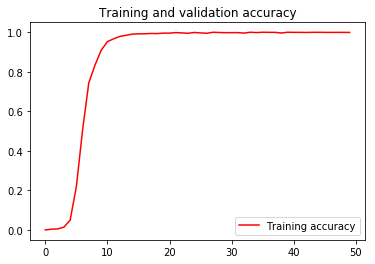

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
#val_acc = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [124]:
import numpy as np
#from google.colab import files
#from tf.keras.preprocessing import image

uploaded = os.listdir('/tmp/google-landmark/test/c/c/f')

for fn in uploaded[0:10]:
 
  # predicting images
  path = '/tmp/google-landmark/test/c/c/f/' + fn
  img = tf.keras.preprocessing.image.load_img(path, target_size=(150, 150))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #print(classes[0])
  index_max = np.argmax(classes[0])
  print("index_max: " + str(index_max))
  print("prob: " + str(classes[0][index_max]))                          
  landmark_id_submission = train_df.sort_values(['landmark_id'], ascending=True).iloc[index_max]['landmark_id']
  print(landmark_id_submission)
  print()
     

index_max: 998
prob: 1.0
122600

index_max: 4556
prob: 0.64514136
200348

index_max: 6995
prob: 1.0
71123

index_max: 998
prob: 1.0
122600

index_max: 998
prob: 1.0
122600

index_max: 6995
prob: 1.0
71123

index_max: 998
prob: 1.0
122600

index_max: 998
prob: 0.9999896
122600

index_max: 998
prob: 1.0
122600

index_max: 998
prob: 0.8709269
122600



### Visualizing Intermediate Representations

--------DRAFT from Humans vs Dogs ----------

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
train_horses_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

NameError: ignored

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)